In [1]:
from utils.reason import AbductiveReasoner
from utils.kernel import KernelD1K9, KernelD2K25
from utils.memory import MemoryLTVHR, MemoryLTVR, MemoryLTVHR2N

In [2]:
# configuration

config = {
        "dataset": "data/dataset",
        "observation_walk_directions": ["btlr"],
        "prediction_walk_directions": ["btlr"],
        "color_frequency_threshold": 2,
        "frequency_threshold": 2,
        "combination_r_min": 1,
        "combination_r_max": 3,
        "num_observation_loops": 1,
        "num_inference_loops": 1,
        "visualize_prediction": False
    }

## First Example

In [3]:
file_name = "db3e9e38"  # first example

In [4]:
kernel = KernelD1K9()  # kernel to get nearest neighbours and the cell in question as the features.

reasoner = AbductiveReasoner(kernel, config)
reasoner.init_task(file_name)

In [5]:
reasoner.observe()

observations = reasoner.create_observation_df(is_sorted=True)
observations.to_csv("data/outputs/observations.csv", index=False)  # observations output

In [6]:
reasoner.reason()  # generate explanations

explanations = reasoner.create_explanation_df(is_sorted=True)
explanations.to_csv("data/outputs/explanations.csv", index=False)  # explanations output

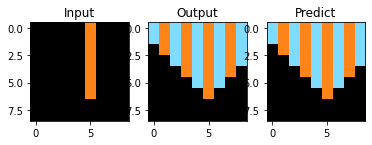

In [7]:
prediction, scores = reasoner.predict(visualize=True)

## Second Example

In [8]:
file_name = "45737921"  # second example

### a) Without the memory and color abstraction implementation 

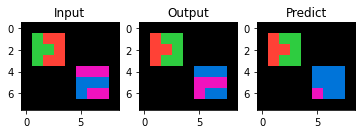

In [9]:
kernel = KernelD1K9()

reasoner = AbductiveReasoner(kernel, config)

reasoner.init_task(file_name)

reasoner.observe()
reasoner.reason()

prediction, scores = reasoner.predict(visualize=True)

### b) With the memory and color abstraction implementation

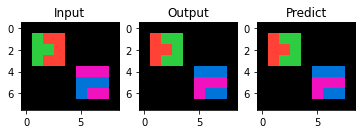

In [10]:
memory = MemoryLTVHR(max_len=6) #  Memory with absolute vertical and horizontal walk, 
                                # R implies a reset on each step

kernel = KernelD1K9(memory)

reasoner = AbductiveReasoner(kernel, config)
reasoner.init_task(file_name)

reasoner.observe()

observations = reasoner.create_observation_df(is_sorted=True)
observations.to_csv("data/outputs/observations2.csv", index=False)

reasoner.reason()

explanations = reasoner.create_explanation_df(is_sorted=True)
explanations.to_csv("data/outputs/explanations2.csv", index=False)

reasoner.explain_color() #  eplain color (color abstraction)
color_explanations = reasoner.create_explanation_df(is_sorted=True, is_color=True)
color_explanations.to_csv("data/outputs/color_explanations2.csv", index=False) #  color explanation output

prediction, scores = reasoner.predict(visualize=True)